## Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.

In [288]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [289]:
def display_components_in_2D_space(components_df, labels=None):
    components_with_labels_df = pd.concat([components_df, pd.DataFrame(labels)], axis=1)

    figsize = (10, 7)
    if labels is not None:
        components_with_labels_df.plot(kind='scatter', x='component_1', y='component_2', 
                                         c=components_with_labels_df.iloc[:, -1],cmap=plt.get_cmap('jet'),
                                         alpha=0.5, figsize=figsize)
    else:
        components_with_labels_df.plot(kind='scatter', x='component_1', y='component_2', alpha=0.5, figsize=figsize)

    plt.xlabel('component_1')
    plt.ylabel('component_2')
    plt.title('2D mapping of objects')    
    plt.show()

In [290]:
def reduce_dims(df, dims=2, method='pca', perplexity=30):
    
    assert method in ['pca', 'tsne'], 'Неверно указан метод'
    
    if method=='pca':
        dim_reducer = PCA(n_components=dims, random_state=42)
        components = dim_reducer.fit_transform(df)
    elif method == 'tsne':
        dim_reducer = TSNE(n_components=dims, learning_rate=250, random_state=42, perplexity=perplexity)
        components = dim_reducer.fit_transform(df)
    else:
        print('Error')
        
    colnames = ['component_' + str(i) for i in range(1, dims+1)]
    return dim_reducer, pd.DataFrame(data = components, columns = colnames) 

In [291]:
from sklearn.model_selection import train_test_split

In [292]:
boston = load_boston()

In [293]:
data=boston.data

In [294]:
ft_names=boston.feature_names

In [295]:
price=boston.target

In [296]:
X = pd.DataFrame(data, columns=ft_names)

In [297]:
y=pd.DataFrame(price, columns=['price'])

In [298]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [299]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [300]:
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=ft_names)

X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=ft_names)

In [301]:
from sklearn.manifold import TSNE

In [302]:
train_tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne=train_tsne.fit_transform(X_train_scaled)


In [303]:
import matplotlib.pyplot as plt

In [304]:
plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format='svg'
%matplotlib inline

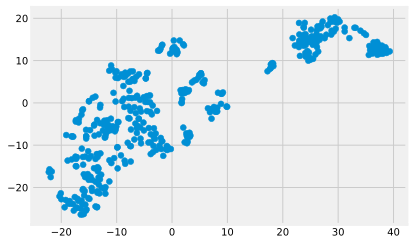

In [305]:
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1])
plt.show()

In [306]:
dim_reducer2d_tsne, components_2d_tsne = reduce_dims(X_train_scaled, dims=2, method='tsne', perplexity=50)

In [203]:
components_2d_tsne

,component_1,component_2
0,-10.382915,16.338959
1,6.117491,-4.944902
2,13.646625,-9.802613
3,-15.464701,11.969748
4,0.473892,-4.337439
...,...,...
399,-1.925069,-3.061794
400,8.242123,-3.927817
401,16.939764,-12.760673
402,-14.377112,12.946928


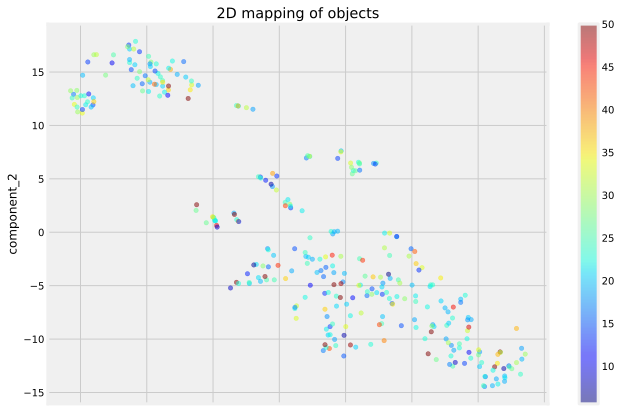

In [204]:
display_components_in_2D_space(components_2d_tsne, y_train)

## Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.

In [307]:
from sklearn.cluster import KMeans

In [308]:
kmeans_3 = KMeans(n_clusters=3, max_iter=100, random_state=42)
labels_clast_3 = kmeans_3.fit_predict(X_train_scaled)
labels_clast_3 = pd.Series(labels_clast_3, name='clusters_3')

In [309]:
X_train_tsne_s=pd.DataFrame(X_train_tsne)
X_train_tsne_s=X_train_tsne_s.set_axis(['component_1', 'component_2'], axis=1,  inplace=False)

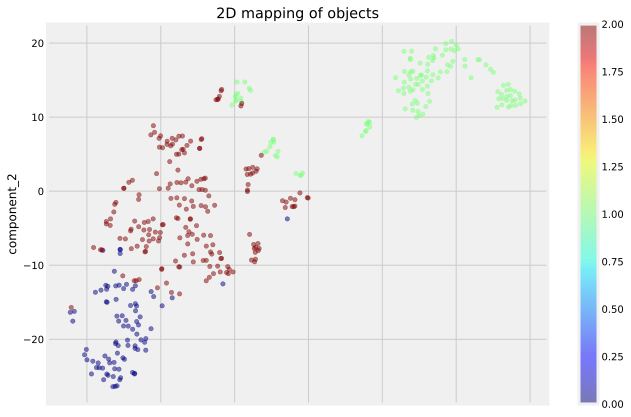

In [208]:
display_components_in_2D_space(X_train_tsne_s, labels_clast_3)

In [310]:
X_train_cluster = pd.concat([X_train_scaled, labels_clast_3], axis=1)

In [311]:
X_train_cluster['price']=y_train

In [312]:
print('Первый кластер: ', X_train_cluster.query('clusters_3==0')['CRIM'].mean())
print('Второй кластер:', X_train_cluster.query('clusters_3==1')['CRIM'].mean())
print('Третий кластер:', X_train_cluster.query('clusters_3==2')['CRIM'].mean())

Первый кластер:  -0.3988641865191748
Второй кластер: 0.8109035550510459
Третий кластер: -0.3595938819415387


In [313]:
print('Первый кластер: ', X_train_cluster.loc[(X_train_cluster['clusters_3']==0)]['price'].mean())
print('Второй кластер: ', X_train_cluster.loc[(X_train_cluster['clusters_3']==1)]['price'].mean())
print('Третий кластер:', X_train_cluster.loc[(X_train_cluster['clusters_3']==2)]['price'].mean())

Первый кластер:  24.04657534246575
Второй кластер:  24.06999999999999
Третий кластер: 24.708974358974363


In [314]:
y_train_scaled = scaler.fit_transform(y_train)
y_train_scaled = pd.DataFrame(y_train_scaled)

In [269]:
y_train

,price
477,12.0
15,19.9
332,19.4
423,13.4
19,18.2
...,...
106,19.5
270,21.1
348,24.5
435,13.4


## *Задание 3
Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


In [315]:
labels_clast_3_test = kmeans_3.predict(X_test_scaled)
labels_clast_3_test = pd.Series(labels_clast_3_test, name='clusters_3')

In [316]:
X_test_scaled['clusters_3']=labels_clast_3_test

In [317]:
print('Первый кластер: ',X_test_scaled.loc[(X_test_scaled['clusters_3']==0)]['CRIM'].mean())
print('Второй кластер: ',X_test_scaled.loc[(X_test_scaled['clusters_3']==1)]['CRIM'].mean())
print('Третий кластер:',X_test_scaled.loc[(X_test_scaled['clusters_3']==2)]['CRIM'].mean())

Первый кластер:  -0.47839399382342146
Второй кластер:  0.8803216939327015
Третий кластер: -0.4508131427450952


In [368]:
X_train_scaled['price']=y_train

In [370]:
X_test_scaled['price']=y_train

In [371]:
print('Первый кластер: ', X_test_scaled.loc[(X_test_scaled['clusters_3']==0)]['price'].mean())
print('Второй кластер: ', X_test_scaled.loc[(X_test_scaled['clusters_3']==1)]['price'].mean())
print('Третий кластер:',X_test_scaled.loc[(X_test_scaled['clusters_3']==2)]['price'].mean())

Первый кластер:  22.946666666666662
Второй кластер:  22.038461538461533
Третий кластер: 22.457575757575757
